In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cancer-data/Cancer_Data.csv


In [2]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

In [3]:
#Reading data
all_data = pd.read_csv("/kaggle/input/cancer-data/Cancer_Data.csv")
print(all_data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [4]:
print(all_data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
#Get rid of id column and transform label in categorical values
all_data = all_data.drop(['id'], axis=1)
all_data.diagnosis = all_data.diagnosis.replace({'B': 0, 'M': 1})

In [6]:
#I don't know what column is this but it appeared in columns
all_data = all_data.drop(['Unnamed: 32'], axis=1)

In [7]:
#Check for null values
print(all_data.columns.isnull().any())

False


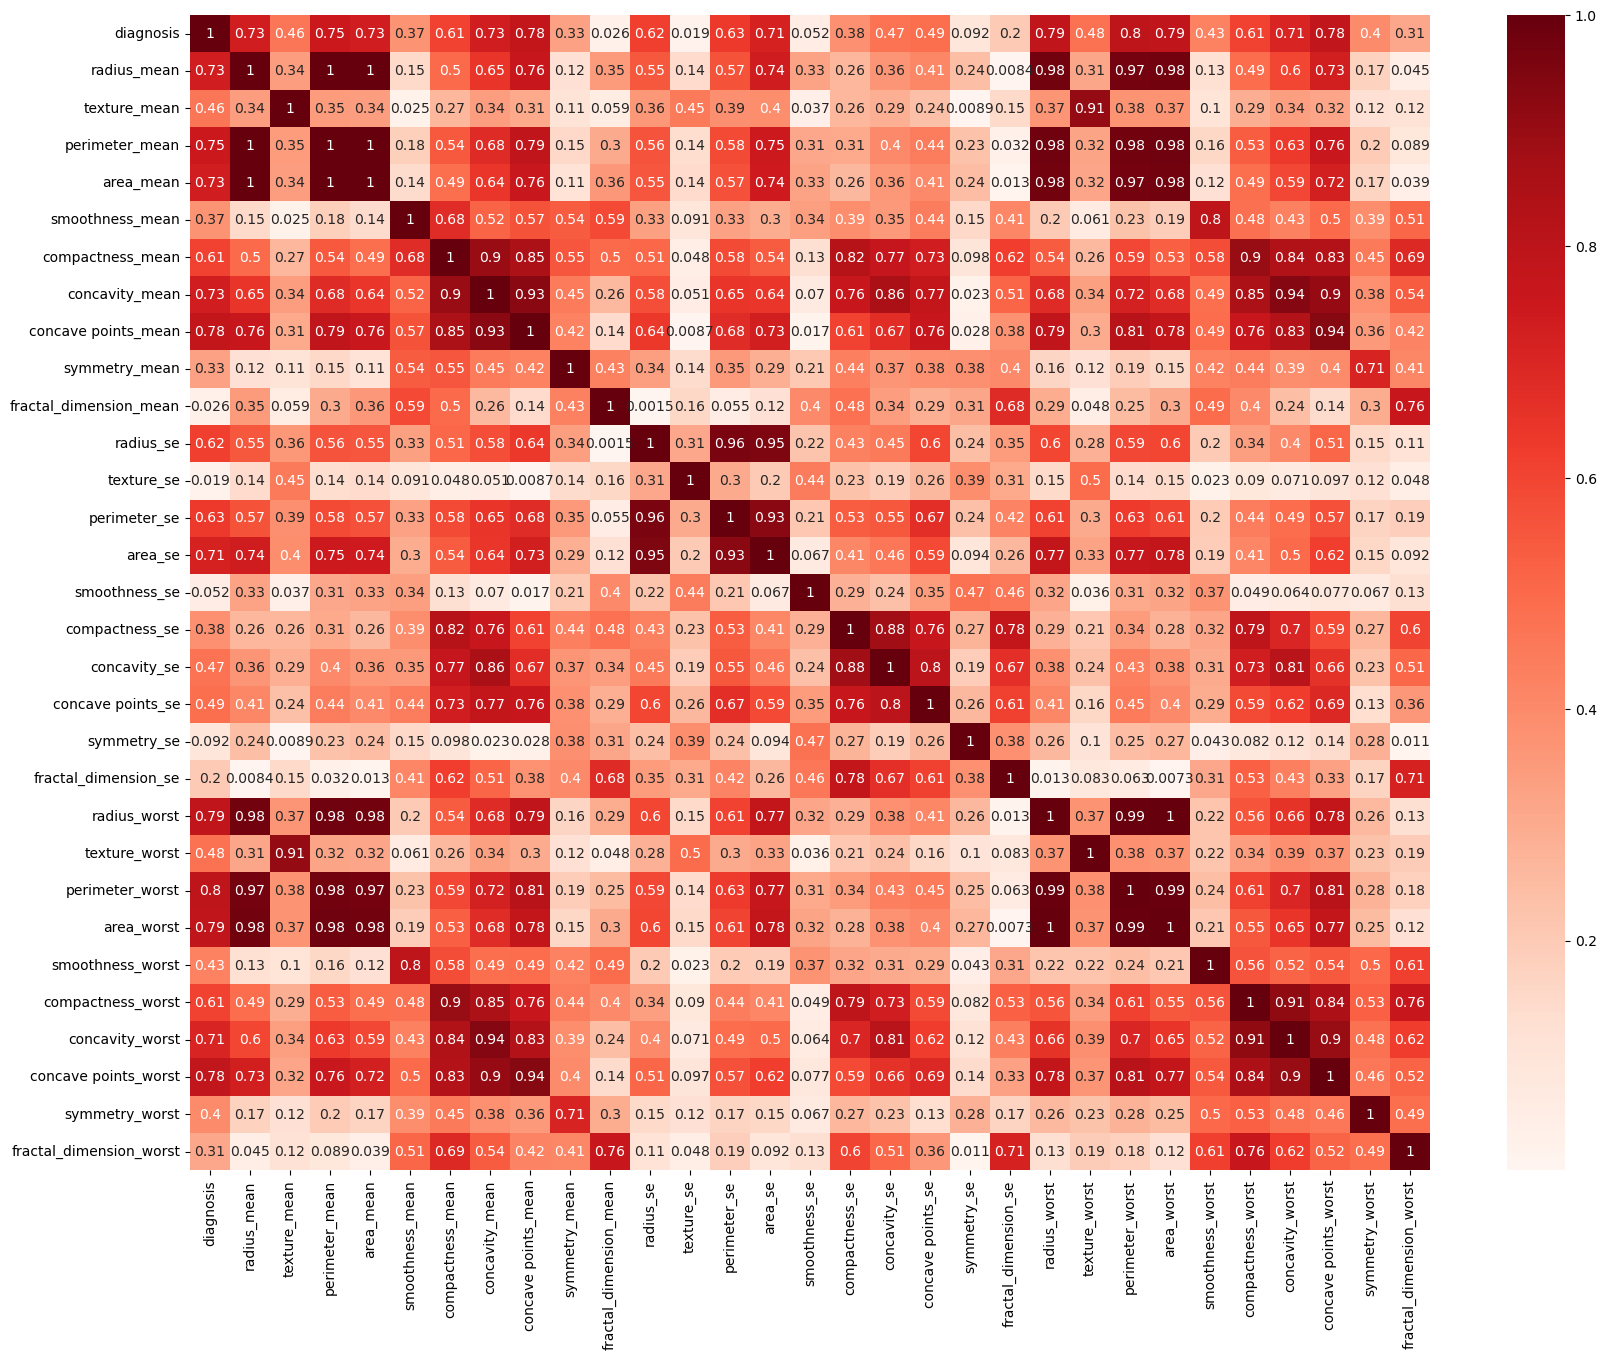

In [8]:
#We'll do a correlation matrix heatmap, to see the relation between variable 
#Use spearman method as we don't know how the data is distributed and what correlation is between features
corr_matrix = all_data.corr(method='spearman').abs()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap="Reds")
plt.show()

In [9]:
#Sharing the data into labels and features
X = all_data.drop(['diagnosis'], axis=1)
Y = all_data['diagnosis']
# print(X.shape)

In [10]:
#Here I tried a function to remove outliers, but after this there will not remain enough data
#And if i modify the 1.5 threshold, I have to modify to the point where there will remain outliers if i want to have enough data
# def remove_outliers(dataframe):
#     cols = dataframe.columns

#     for i in range(len(cols)):
#         Q1 = dataframe[cols[i]].quantile(0.25)
#         Q3 = dataframe[cols[i]].quantile(0.75)
#         IQR = Q3 - Q1

#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         dataframe = dataframe[(dataframe[cols[i]] >= lower_bound) & (dataframe[cols[i]] <= upper_bound)]
    
#     return dataframe

# X = remove_outliers(X)
# print(X.shape)

In [11]:
#Let's see how diagnosis behave vs each feature
cols = X.columns
fig = go.Figure()

for i in range(len(cols)):
    fig.add_trace(go.Scatter(x=all_data[cols[i]], y=Y, mode='markers', name='Diagnosis vs. ' + cols[i]))

buttons = []

for i in range(len(cols)):
    buttons.append(dict(method='update', label=cols[i], args=[{'visible': [True if j == i else False for j in range(len(cols))]},
                                                                 {'title': 'Diagnosis vs ' + cols[i]}]))

updatemenu = []
menu = {}
updatemenu.append(menu)

updatemenu[0]['buttons'] = buttons

fig.update_layout(updatemenus=updatemenu)
fig.update_layout(width=1200, height=500)

fig.show()

In [12]:
#Box plots for every feature to see some statistics and outliers
cols = X.columns
fig = go.Figure()

for i in range(len(cols)):
    fig.add_trace(go.Box(y=X[cols[i]], name=cols[i]))

buttons = []

for i in range(len(cols)):
    buttons.append(dict(method='update', label=cols[i], args=[{'visible': [True if j == i else False for j in range(len(cols))]},
                                                                 {'title': cols[i]}]))

updatemenu = []
menu = {}
updatemenu.append(menu)

updatemenu[0]['buttons'] = buttons

fig.update_layout(updatemenus=updatemenu)
fig.update_layout(width=1200, height=500)

fig.show()

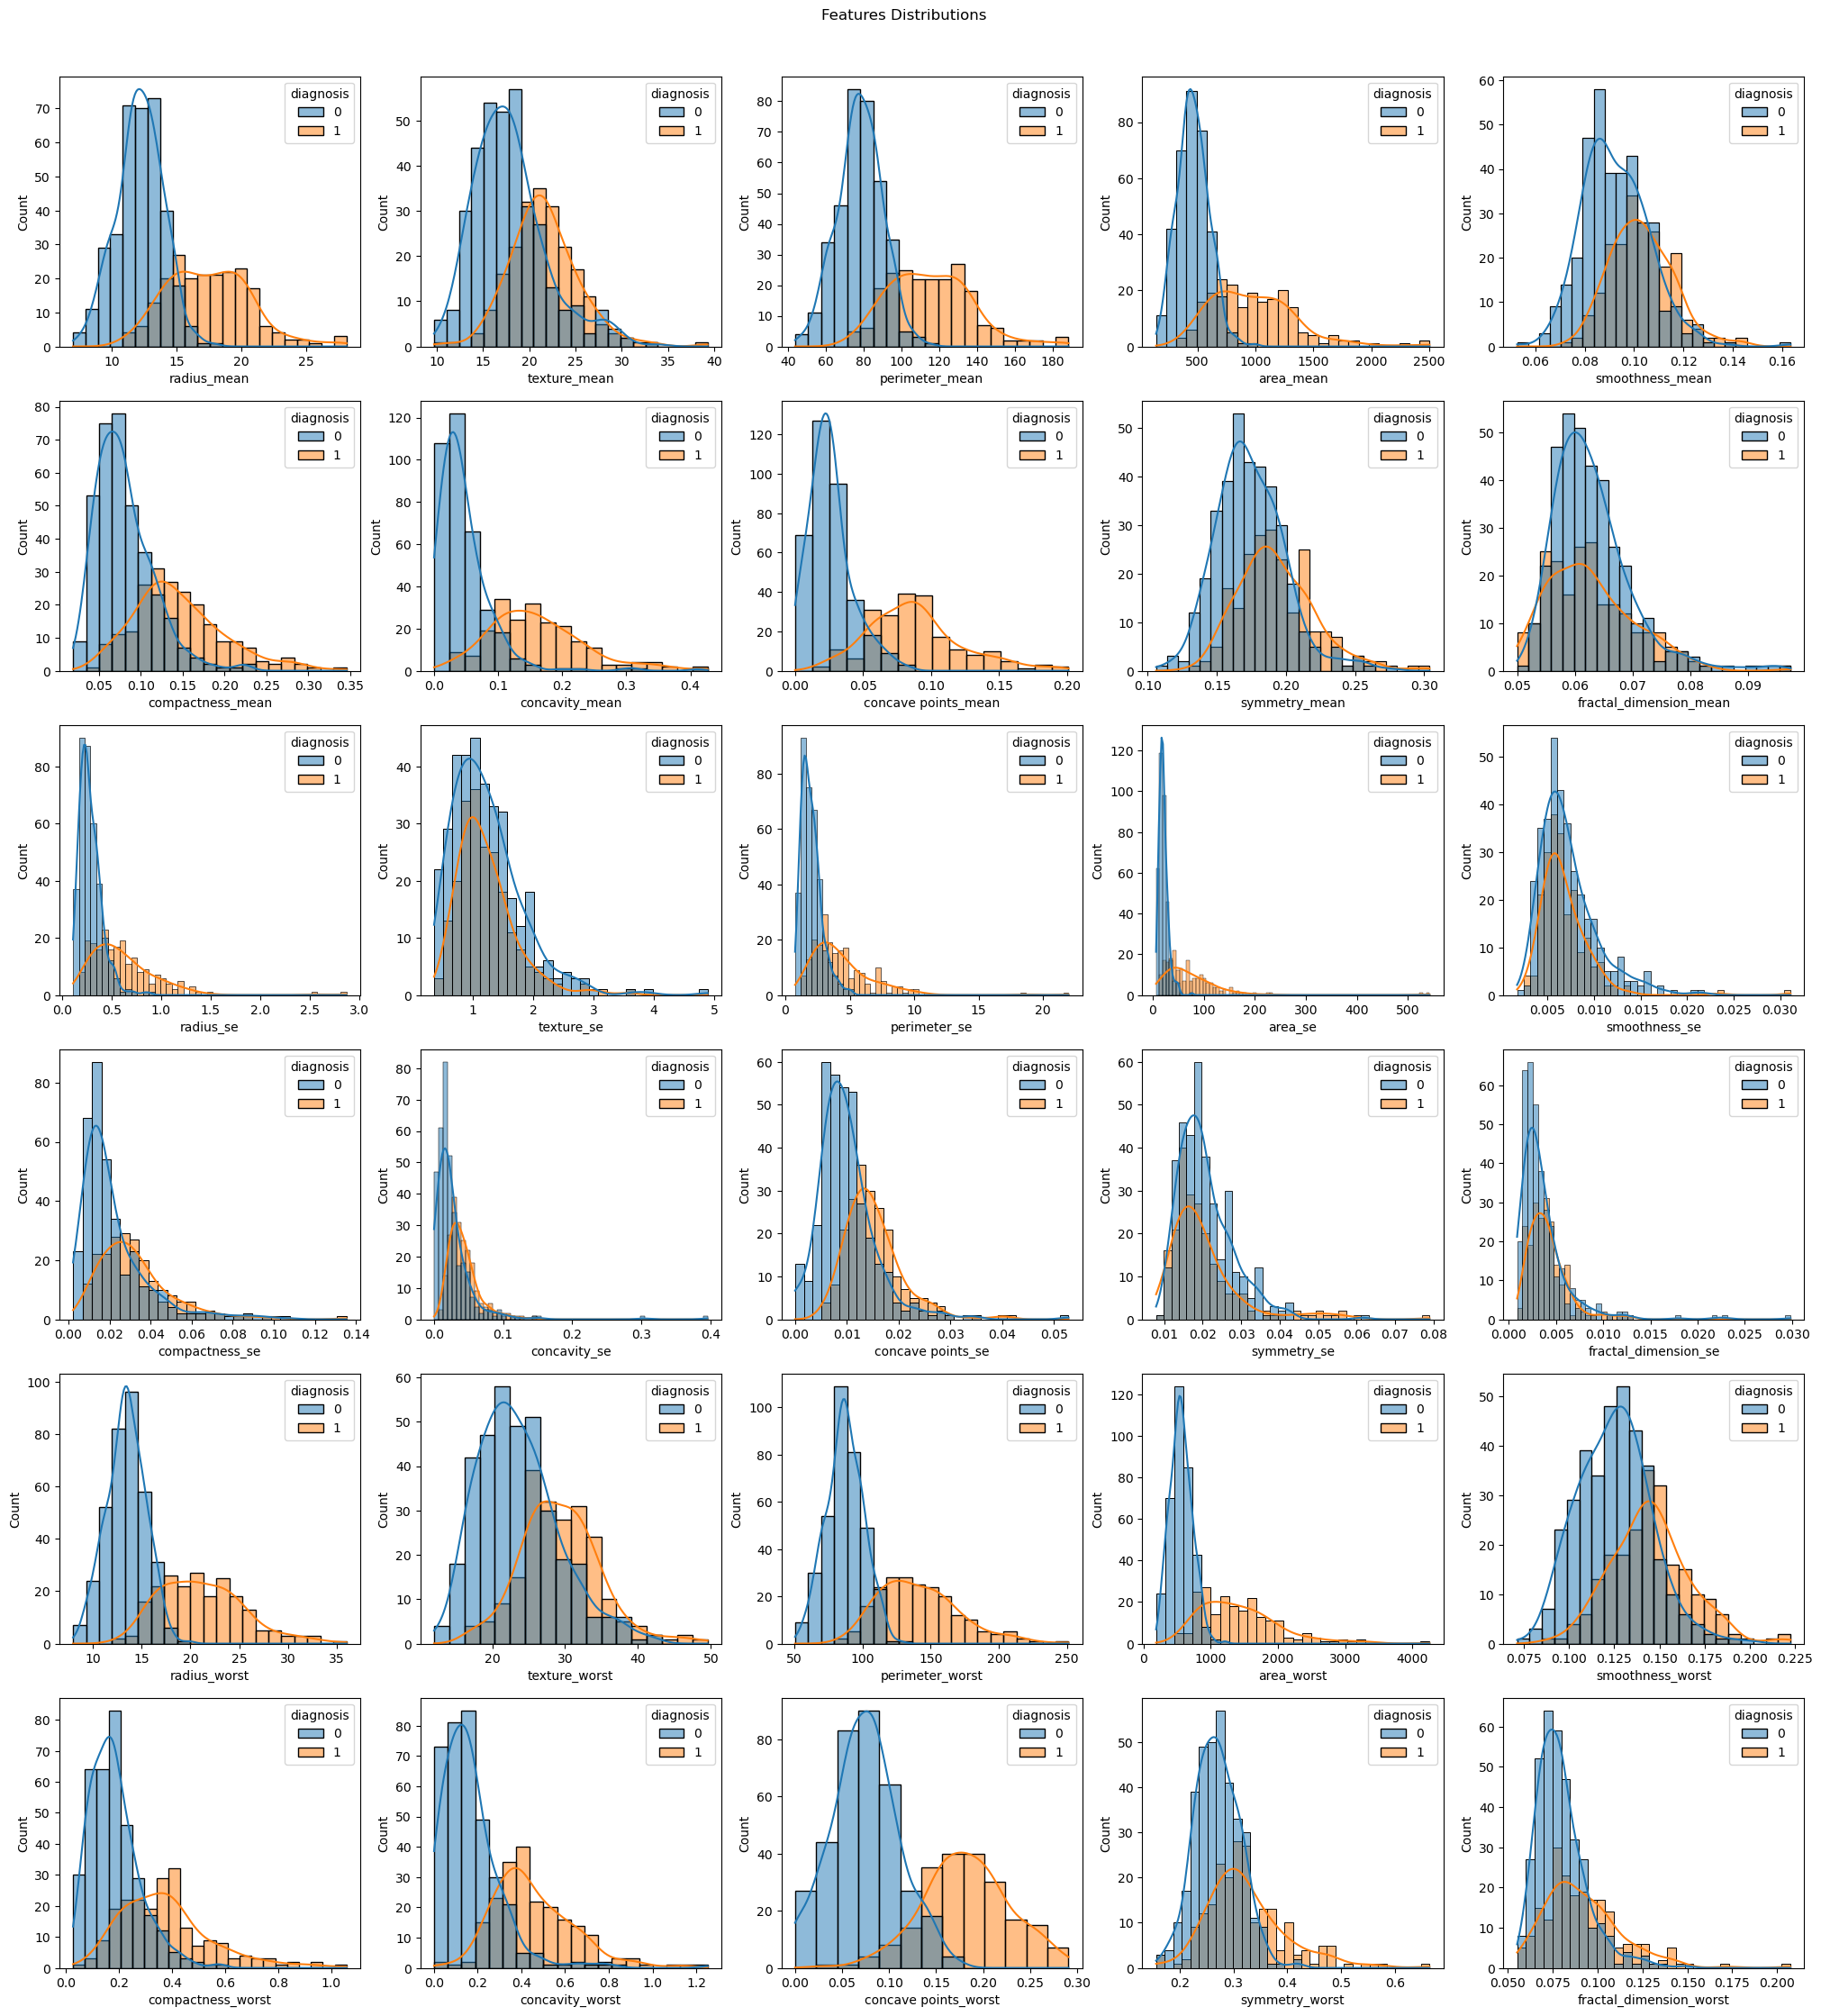

In [13]:
#Distribution for each feature
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(25, 25))

for i in range(len(cols)):
    sns.histplot(data=all_data, x = X[cols[i]], ax = axes[i // 5][i % 5], kde=True, hue='diagnosis')

fig.suptitle("Features Distributions")

plt.subplots_adjust(top=0.95)

plt.show()

In [14]:
#Let's normalize the data to have better performance
scaler = MinMaxScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

In [15]:
#Split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size=0.25)

In [16]:
#Here we make a cross validation to see what model performs better
#And get the accuracy for SVC as it has the best performance
LR = LogisticRegression(solver='liblinear', penalty='l1')
LR_scores = cross_val_score(LR, X_train, Y_train, cv = 5)
print("Accuracy scores for LR: ", LR_scores)
print("Average accuracy score for LR: ", LR_scores.mean())

RF = RandomForestClassifier()
RF_scores = cross_val_score(RF, X_train, Y_train, cv = 5)
print("Accuracy scores for RF: ", RF_scores)
print("Average accuracy score for RF: ", RF_scores.mean())

SV = SVC(C=10, gamma=1)
SV_scores = cross_val_score(SV, X_train, Y_train, cv = 5)
print("Accuracy scores for SV: ", SV_scores)
print("Average accuracy score for SV: ", SV_scores.mean())

SV.fit(X_train, Y_train)
predictions = SV.predict(X_test)
print('Accuracy for SVC on test data:', metrics.accuracy_score(Y_test, predictions))

Accuracy scores for LR:  [0.96511628 0.98823529 0.97647059 0.97647059 0.95294118]
Average accuracy score for LR:  0.9718467852257182
Accuracy scores for RF:  [0.98837209 0.97647059 0.96470588 0.96470588 0.95294118]
Average accuracy score for RF:  0.9694391244870042
Accuracy scores for SV:  [1.         0.97647059 0.98823529 0.96470588 0.97647059]
Average accuracy score for SV:  0.9811764705882353
Accuracy for SVC on test data: 0.972027972027972


In [17]:
#Next we will make confussion matrix and calculate precision and recall for every model to see the performance
y_train_pred_LR = cross_val_predict(LR, X_train, Y_train, cv=5)
metrics.confusion_matrix(Y_train, y_train_pred_LR)

array([[261,   1],
       [ 11, 153]])

In [18]:
print("Precision for LR:", metrics.precision_score(Y_train, y_train_pred_LR))
print("Recall for LR:", metrics.recall_score(Y_train, y_train_pred_LR))

Precision for LR: 0.9935064935064936
Recall for LR: 0.9329268292682927


In [19]:
y_train_pred_RF = cross_val_predict(RF, X_train, Y_train, cv=5)
metrics.confusion_matrix(Y_train, y_train_pred_RF)

array([[256,   6],
       [  9, 155]])

In [20]:
print("Precision for RF:", metrics.precision_score(Y_train, y_train_pred_RF))
print("Recall for RF:", metrics.recall_score(Y_train, y_train_pred_RF))

Precision for RF: 0.9627329192546584
Recall for RF: 0.9451219512195121


In [21]:
y_train_pred_SV = cross_val_predict(SV, X_train, Y_train, cv=5)
metrics.confusion_matrix(Y_train, y_train_pred_SV)

array([[259,   3],
       [  5, 159]])

In [22]:
print("Precision for SV:", metrics.precision_score(Y_train, y_train_pred_SV))
print("Recall for SV:", metrics.recall_score(Y_train, y_train_pred_SV))

Precision for SV: 0.9814814814814815
Recall for SV: 0.9695121951219512


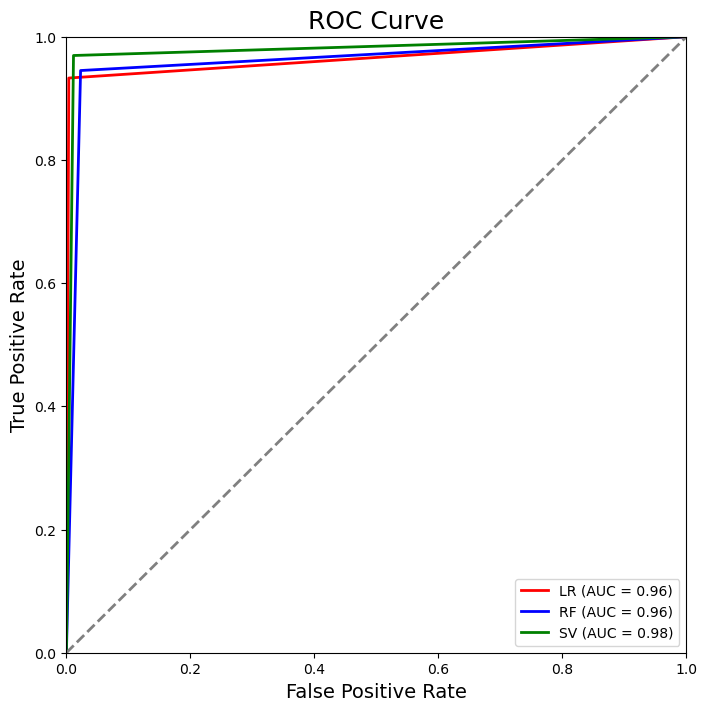

In [23]:
#Make a plot with ROC Curve, another performance measurement
fpr_1, tpr_1, _ = metrics.roc_curve(Y_train, y_train_pred_LR)
auc_1 = metrics.auc(fpr_1, tpr_1)
fpr_2, tpr_2, _ = metrics.roc_curve(Y_train, y_train_pred_RF)
auc_2 = metrics.auc(fpr_2, tpr_2)
fpr_3, tpr_3, _ = metrics.roc_curve(Y_train, y_train_pred_SV)
auc_3 = metrics.auc(fpr_3, tpr_3)

plt.figure(figsize=(8, 8))
plt.plot(fpr_1, tpr_1, color='red', lw=2, label='LR (AUC = %0.2f)' % auc_1)
plt.plot(fpr_2, tpr_2, color='blue', lw=2, label='RF (AUC = %0.2f)' % auc_2)
plt.plot(fpr_3, tpr_3, color='green', lw=2, label='SV (AUC = %0.2f)' % auc_3)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=18)
plt.legend(loc="lower right")
plt.show()